<a href="https://colab.research.google.com/github/itspallavi20/Oral_Diseases_Prediction/blob/main/models/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir = '/content/drive/MyDrive/Oral_Diseases_Project/Dataset/Train'
val_dir = '/content/drive/MyDrive/Oral_Diseases_Project/Dataset/Validation'

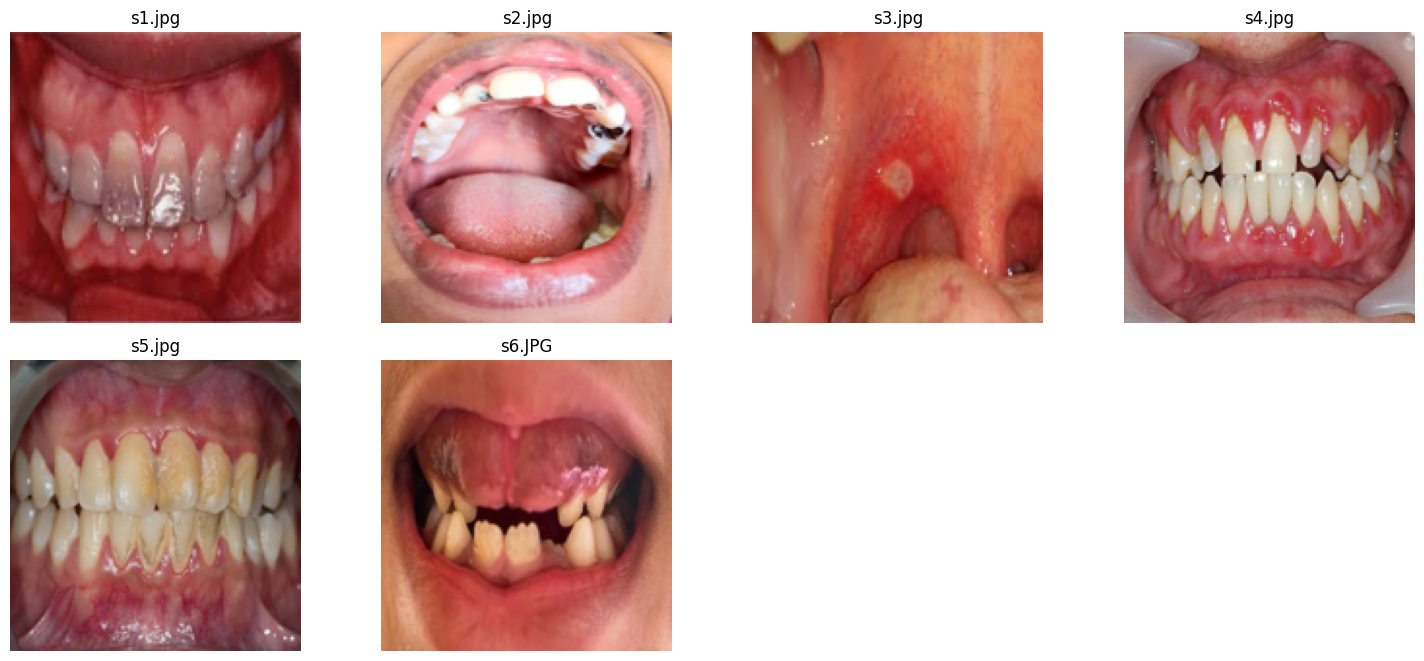

In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255)
def display_sample_images(sample_images_dir, num_images=12):
    images = [img for img in os.listdir(sample_images_dir) if os.path.isfile(os.path.join(sample_images_dir, img))]
    num_images = min(num_images, len(images))

    plt.figure(figsize=(15, 10))
    for count, image in enumerate(images[:num_images]):
        img_path = os.path.join(sample_images_dir, image)
        img = Image.open(img_path)
        img = img.resize((150, 150))
        plt.subplot(3, 4, count + 1)
        plt.imshow(img)
        plt.title(image)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

sample_images_dir = '/content/drive/My Drive/Oral_Diseases_Project/Dataset/Sample_Images'
display_sample_images(sample_images_dir, num_images=6)



In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 1504 images belonging to 6 classes.
Found 300 images belonging to 6 classes.


In [ ]:
num_classes = train_generator.num_classes
print(f"Number of classes detected in training data: {num_classes}")

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)

Number of classes detected in training data: 6
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 463s 8s/step - accuracy: 0.6059 - loss: 1.2023 - val_accuracy: 0.5035 - val_loss: 1.4191
Epoch 2/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 214ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0833 - val_loss: 2.7450
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 197ms/step - accuracy: 0.8594 - loss: 0.4265 - val_accuracy: 0.5139 - val_loss: 1.5810
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4167 - val_loss: 1.2852
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 203ms/step - accuracy: 0.9342 - loss: 0.2077 - val_accuracy: 0.5799 - val_loss: 1.2058
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5833 - val_loss: 1.3511
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 213ms/step - accuracy: 0.9479 - loss: 0.1803 - val_accuracy: 0.6736 - val_loss: 0.8924
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8333 - val_loss: 0.4028
Epoch 9/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 203ms/step - accuracy: 0.9701 - loss: 0.13

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss',patience=5 ,restore_best_weights=True)
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    batch_size=32,
    callbacks=[early_stopping]
)

Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 225ms/step - accuracy: 0.9717 - loss: 0.0863 - val_accuracy: 0.7000 - val_loss: 0.8344
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 205ms/step - accuracy: 0.9767 - loss: 0.0700 - val_accuracy: 0.5967 - val_loss: 1.3724
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 189ms/step - accuracy: 0.9727 - loss: 0.0731 - val_accuracy: 0.6867 - val_loss: 0.9076
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 214ms/step - accuracy: 0.9785 - loss: 0.0802 - val_accuracy: 0.6433 - val_loss: 1.0800
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 202ms/step - accuracy: 0.9775 - loss: 0.0649 - val_accuracy: 0.6633 - val_loss: 1.0914
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 185ms/step - accuracy: 0.9759 - loss: 0.0516 - val_accuracy: 0.5733 - val_loss: 1.7355


In [ ]:
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']
avg_train_accuracy = np.mean(train_accuracy)
avg_train_loss = np.mean(train_loss)
avg_val_accuracy = np.mean(val_accuracy)
avg_val_loss = np.mean(val_loss)
print(f"Average Training Accuracy: {avg_train_accuracy:.4f}")
print(f"Average Validation Accuracy: {avg_val_accuracy:.4f}")
print(f"Average Training Loss: {avg_train_loss:.4f}")
print(f"Average Validation Loss: {avg_val_loss:.4f}")


Average Training Accuracy: 0.9732
Average Validation Accuracy: 0.6439
Average Training Loss: 0.0798
Average Validation Loss: 1.1702


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 176ms/step
Confusion Matrix:
[[ 1  1  9  8  2  2]
 [ 2  1  7  5  3  0]
 [ 7  2 21 20  5  2]
 [18  6 41 60 17 11]
 [ 1  1 10 13  4  1]
 [ 2  0  6 10  1  0]]


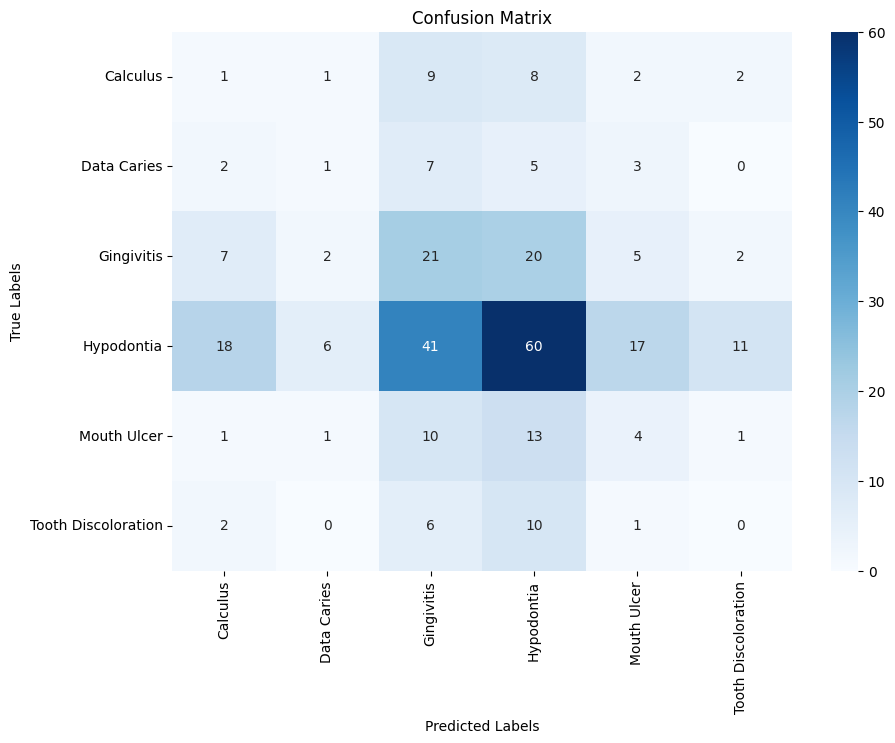

Classification Report:
                     precision    recall  f1-score   support

           Calculus       0.03      0.04      0.04        23
        Data Caries       0.09      0.06      0.07        18
         Gingivitis       0.22      0.37      0.28        57
         Hypodontia       0.52      0.39      0.45       153
        Mouth Ulcer       0.12      0.13      0.13        30
Tooth Discoloration       0.00      0.00      0.00        19

           accuracy                           0.29       300
          macro avg       0.16      0.17      0.16       300
       weighted avg       0.33      0.29      0.30       300

Class Calculus:
  True Positives (TP): 1
  True Negatives (TN): 247
  False Positives (FP): 30
  False Negatives (FN): 22
------------------------------
Class Data Caries:
  True Positives (TP): 1
  True Negatives (TN): 272
  False Positives (FP): 10
  False Negatives (FN): 17
------------------------------
Class Gingivitis:
  True Positives (TP): 21
  True Nega

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `model` is your trained model and `test_generator` is the test dataset
# Step 1: Predict on the test dataset
y_pred_prob = model.predict(val_generator, verbose=1)  # Predicted probabilities
y_pred_classes = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels

# Step 2: Get true labels from the test dataset
y_true = val_generator.classes  # Ground truth labels

# Step 3: Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Step 4: Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Step 5: Visualize the confusion matrix
plt.figure(figsize=(10, 7))
class_names = list(val_generator.class_indices.keys())  # Get class names
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Step 6: Print the classification report
report = classification_report(y_true, y_pred_classes, target_names=class_names)
print("Classification Report:")
print(report)

# Step 7: Calculate TP, TN, FP, FN for each class
for i, class_name in enumerate(class_names):
    tp = cm[i, i]
    fn = cm[i, :].sum() - tp
    fp = cm[:, i].sum() - tp
    tn = cm.sum() - (tp + fn + fp)
    print(f"Class {class_name}:")
    print(f"  True Positives (TP): {tp}")
    print(f"  True Negatives (TN): {tn}")
    print(f"  False Positives (FP): {fp}")
    print(f"  False Negatives (FN): {fn}")
    print("-" * 30)
